In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from Data.Featurisation import data_handeler
import numpy as np
import scienceplots
plt.rcdefaults()
plt.style.use(['science'])
avg_rmse = pd.read_pickle("evaluation/Target/avg_rmse.pkl")
avg_times = pd.read_pickle("evaluation/Target/avg_times.pkl")

rmse = pd.read_pickle("evaluation/Target/rmse.pkl")
time = pd.read_pickle("evaluation/Target/times.pkl")
time = time.loc[:,(slice(None), 'Training Time')]
sites = range(4)
models = [0,1,5,6,2,3,4,8,9]
model_labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I"]
import itertools
 
print(time)

one                0             1             2             3             4   \
two     Training Time Training Time Training Time Training Time Training Time   
one two                                                                         
0   0        2.920837      0.967775      2.223181      1.989337      1.572948   
    1         5.02733      1.878347      4.002256      3.818203      1.358334   
    2         5.95365      2.336537      5.946898      5.727289      2.089437   
    3        7.845166      3.078512       7.95097      7.629888      2.833604   
    4       10.295493      4.165633      9.943014      9.567453      3.662633   
    5       11.984792      4.628325     11.871365     11.499167       4.40676   
    6       14.393975      5.390774     13.852081     13.439379      5.158652   
    7       15.392888      6.479703     15.824379     15.864573      5.856895   
    8       17.329535      7.002849     18.097751     17.814586      6.059064   
    9       19.976144      7

## Zero-shot accuracy

In [12]:
zero_shot_rmse = rmse.loc[(slice(None), 0), :]
zero_shot_rmse = zero_shot_rmse.droplevel(1)
zero_shot_rmse.astype(float).round(2).transpose()

one,0,1,2,3
0,239.67,192.39,543.17,263.73
1,232.89,192.53,552.78,253.86
2,323.99,270.19,550.55,265.22
3,1065.83,902.79,1244.89,582.92
4,1042.54,886.59,1234.90,565.28
5,260.56,233.60,594.03,216.75
6,284.16,214.88,628.86,228.09
7,227.90,227.90,227.90,228.09
8,325.98,250.41,963.27,234.16
9,379.32,348.92,689.13,287.17


In [3]:
(1-zero_shot_rmse.div(zero_shot_rmse[9], axis=0)).astype(float).round(4).transpose()

one,0,1,2,3
0,0.3682,0.4486,0.2118,0.0816
1,0.3860,0.4482,0.1978,0.1160
2,0.1459,0.2256,0.2011,0.0765
3,-1.8098,-1.5874,-0.8065,-1.0299
4,-1.7484,-1.5410,-0.7920,-0.9685
5,0.3131,0.3305,0.1380,0.2452
6,0.2509,0.3842,0.0875,0.2057
7,0.3992,0.3468,0.6693,0.2057
8,0.1406,0.2823,-0.3978,0.1846
9,0.0000,0.0000,0.0000,0.0000


## RMSE target

In [4]:
#AVG RMSE
avg_rmse = pd.DataFrame(index=models, columns=sites)
for site in sites:
    _,_, eval_data = data_handeler(site, "nwp", "nwp", "nwp", transform=True)
    for model in models:  
        with open(f"DA_forecasts/DA_{model}_{site}", 'rb') as f:
            DA_forecast = pickle.load(f)
        
        power = eval_data['P']
        # if model in [3,4]:
        DA_forecast = DA_forecast[31*24:] #(30 days + 1 lag day)*24
        power = power[31*24:] 
        avg_rmse.loc[model, site] = np.sqrt(np.mean(np.square(DA_forecast-power)))
        
     

Not in Colab environment: Using .pkl files


/users/students/r0778797/SolNet-2/Data/Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


Not in Colab environment: Using .pkl files


/users/students/r0778797/SolNet-2/Data/Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


Not in Colab environment: Using .pkl files


/users/students/r0778797/SolNet-2/Data/Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


Not in Colab environment: Using .pkl files


/users/students/r0778797/SolNet-2/Data/Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


In [13]:
print(avg_rmse.astype(float).round(2))

        0       1       2       3
0  198.61  168.30  556.59  170.71
1  201.07  170.05  557.94  169.99
5  222.76  170.73  535.05  142.62
6  216.38  170.15  529.75  142.36
2  303.87  249.43  623.65  221.31
3  227.14  207.55  590.21  143.95
4  226.97  189.83  532.31  144.27
8  292.28  211.75  883.45  178.10
9  377.29  312.09  764.94  243.54


In [14]:
print((1-avg_rmse/avg_rmse.loc[9]).astype(float).round(4))

        0       1       2       3
0  0.4736  0.4607  0.2724  0.2991
1  0.4671  0.4551  0.2706  0.3020
5  0.4096  0.4529  0.3005  0.4144
6  0.4265  0.4548  0.3075  0.4155
2  0.1946  0.2008  0.1847  0.0913
3  0.3980  0.3350  0.2284  0.4089
4  0.3984  0.3917  0.3041  0.4076
8  0.2253  0.3215 -0.1549  0.2687
9  0.0000  0.0000  0.0000  0.0000


/tmp/ipykernel_137737/3165989636.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_137737/3165989636.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_137737/3165989636.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_137737/3165989636.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


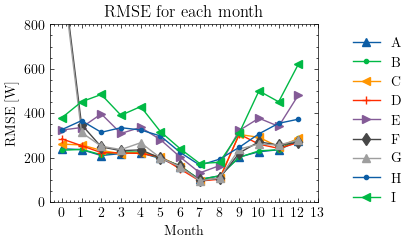

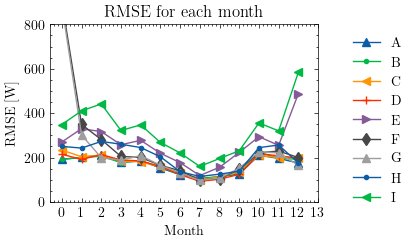

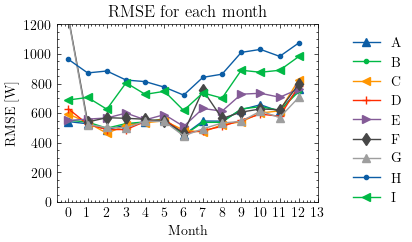

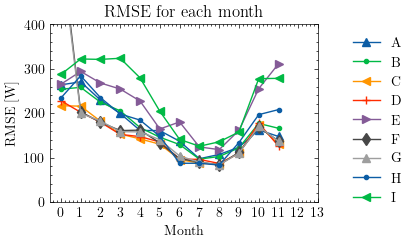

In [6]:
ymax = [800, 800, 1200, 400]

for j, site in enumerate(sites):
    #RMSE
    marker = itertools.cycle(('^', '.', '<', '+', '>', 'd'))
    fig = plt.figure(site)
    for i, model in enumerate(models):
        if i <= 6:
            fmt = "^-"
        else:
            fmt=""
        plt.plot(rmse.loc[(site, slice(None)), model].values, marker=next(marker), linestyle="-", label = model_labels[i])
    plt.ylim([0, ymax[j]])
    fig.legend(loc="center left", bbox_to_anchor=(1,0.5))
    plt.title("RMSE for each month")
    plt.xlabel("Month")
    plt.ylabel("RMSE [W]")
    plt.xticks(range(len(rmse.loc[site].index)+1), labels=range(len(rmse.loc[site].index)+1))
    plt.tight_layout()
    plt.savefig(f"Figures/evaluation/rmse_month_s{site}")
    fig.show()

## Time Target

/tmp/ipykernel_137737/2213294375.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_137737/2213294375.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_137737/2213294375.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_137737/2213294375.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


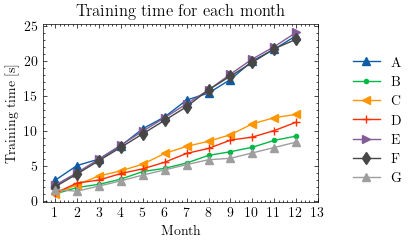

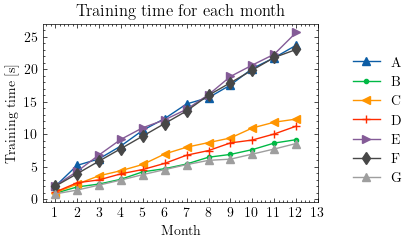

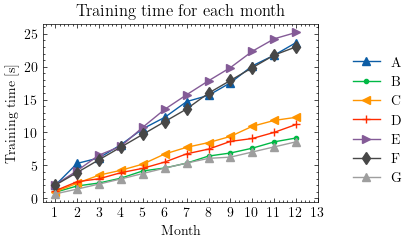

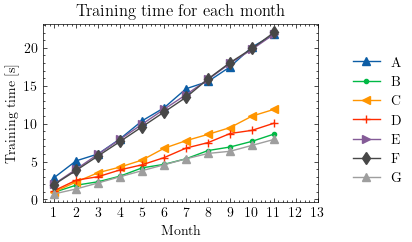

In [7]:
# ymax = [800, 800, 1200, 400]
for j, site in enumerate(sites):
    marker = itertools.cycle(('^', '.', '<', '+', '>', 'd'))
    #RMSE
    fig = plt.figure(site)
    for i, model in enumerate(models):
        if i <=6: 
            plt.plot(time.loc[(site, slice(None)), model].values, marker=next(marker), linestyle="-", label = model_labels[i])
    # plt.ylim([0, ymax[j]])
    fig.legend(loc="center left", bbox_to_anchor=(1,0.5))
    plt.xlabel("Month")
    plt.ylabel("Training time [s]")
    plt.title("Training time for each month")
    plt.xticks(range(len(rmse.loc[site].index)), labels=range(1,len(rmse.loc[site].index)+1))
    plt.tight_layout()
    plt.savefig(f"Figures/evaluation/time_month_{site}")
    fig.show()

In [8]:
training = avg_times.loc[:, (slice(None), 'Training Time')].droplevel(1, axis=1).transpose()
training.astype(float).round(2)

,0,1,2,3
one,,,,
0,13.03,13.15,13.15,12.17
1,5.12,5.09,5.07,4.73
2,13.01,13.57,14.19,11.90
3,12.66,12.74,12.75,11.78
4,4.65,4.68,4.71,4.41
5,6.99,7.06,6.97,6.52
6,6.14,6.14,6.14,5.71
7,5.67,5.67,5.67,5.71
8,NaN,NaN,NaN,NaN


## Skill score target

/tmp/ipykernel_137737/3462015850.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_137737/3462015850.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_137737/3462015850.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_137737/3462015850.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


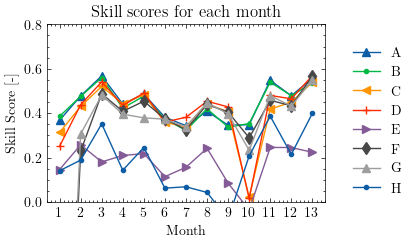

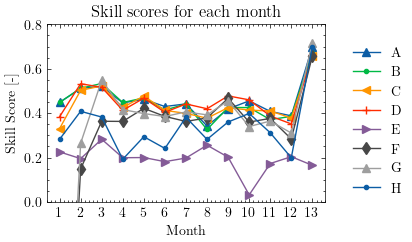

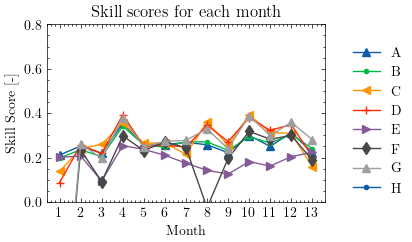

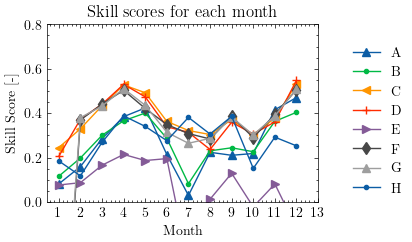

In [9]:
avg_skill_scores = pd.DataFrame(index=sites, columns=models)
for j, site in enumerate(sites):
    marker = itertools.cycle(('^', '.', '<', '+', '>', 'd'))
    persist = rmse.loc[(site, slice(None)), 9].values
    fig = plt.figure(site)
    for i, model in enumerate(models):
        if model != 9:
            rmse_mod_site = rmse.loc[(site, slice(None)), model].values
            ss = 1-  rmse_mod_site/persist
            if model in [3,4]:
                ss_avg = ss[1:]
            else:
                ss_avg = ss
            
            avg_skill_scores.loc[site, model] = np.nanmean(ss)

            plt.plot(ss, marker=next(marker), linestyle="-", label = model_labels[i])
    plt.ylim([0, 0.8])
    fig.legend(loc="center left", bbox_to_anchor=(1,0.5))
    plt.xlabel("Month")
    plt.ylabel("Skill Score [-]")
    plt.title("Skill scores for each month")
    plt.xticks(range(len(rmse.loc[site].index)), labels=range(1,len(rmse.loc[site].index)+1))
    plt.tight_layout()
    plt.savefig(f"Figures/evaluation/ss_month_{site}")
    fig.show()

## nRMSE Source

In [75]:
#nRMSE
metrics =  pd.read_pickle("evaluation/source/metrics.pkl")
rmse_source = metrics.loc[:, (slice(None), "rmse")]
print(rmse_source)

lags = 24
forecast_period = 24
train_test_split = 0.8
source_models = [0,1,2,5,6]
for i in source_models:
    for j in range(4):
        rmse = rmse_source.loc[i,j].values
        if i <=4:
            data_name = "nwp"
        else: 
            data_name = "era5"
        if i in [1,6]:
            phys = True
        else:
            phys = False
        source_data,_, _ = data_handeler(j, data_name, "nwp", "nwp", phys)
        length = len(source_data.index)

        prediction_len = length - lags  # See how much data is used for predictions

        # The number of windows we have to predict depends on the length of the forecast window 
        # (we assume that the forecaster wants to forecast every upcoming period)
        windows = int(prediction_len / forecast_period)  # Get the number of predictions we can make.
        train_len = round(windows * train_test_split)  # Split the features into a train set...
        test_len = windows - train_len  # ... and a test set
        test = source_data.iloc[train_len*forecast_period+lags:]
        test_power = test['P']
        denominator = (test_power**2).mean()
        print(denominator)
        nRMSE = rmse/denominator


one           0           1           2           3    4
two        rmse        rmse        rmse        rmse rmse
0    214.510798  163.818526  260.551767  170.368425  NaN
1     224.40215  164.172116  267.011164  168.338852  NaN
2    337.942533  239.791864  286.400358  231.885139  NaN
3      0.006426         NaN    0.001757    0.007765  NaN
4      0.005625         NaN     0.11291    0.005019  NaN
5    236.459202  173.079215  222.505591  177.363527  NaN
6    233.906099  168.338706  212.568593  172.529857  NaN
7       0.00589         NaN    0.110027    0.004545  NaN
8      0.005885         NaN    0.110027    0.004646  NaN
9           NaN         NaN         NaN         NaN  NaN
10          NaN         NaN         NaN         NaN  NaN
11          NaN         NaN         NaN         NaN  NaN
Not in Colab environment: Using .pkl files
435124.5376243452
Not in Colab environment: Using .pkl files
251545.0664993452
Not in Colab environment: Using .pkl files
2837036.9540125867
Not in Colab envir

c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


432877.98395425593
Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


250906.60622348217
Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


2837036.9540125867
Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


195038.26708836306
Not in Colab environment: Using .pkl files
435124.5376243452
Not in Colab environment: Using .pkl files
251545.0664993452
Not in Colab environment: Using .pkl files
2837036.9540125867
Not in Colab environment: Using .pkl files
195038.26708836306
Not in Colab environment: Using .pkl files
408529.4456505995
Not in Colab environment: Using .pkl files
238163.1399658873
Not in Colab environment: Using .pkl files
2836269.6840755707
Not in Colab environment: Using .pkl files
195488.55370070922
Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


406542.8642336331
Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


237930.62764385494
Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


2836269.6840755707
Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


195488.55370070922
